Import the Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [20]:
#Loading the CSV data to a PANDAS Dataframe
#Gold price in USD/ounce
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [21]:
#Showing the first 5 rows of the data
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [22]:
#Showing the last 5 rows of the data
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [23]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [24]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [25]:
#Checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [26]:
#getting the statistical measures
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation
1. Postive Correlation
2. Negative Correlation

In [32]:
correlation = gold_data.drop(columns=['Date']).corr()


<Axes: >

<Figure size 800x800 with 0 Axes>

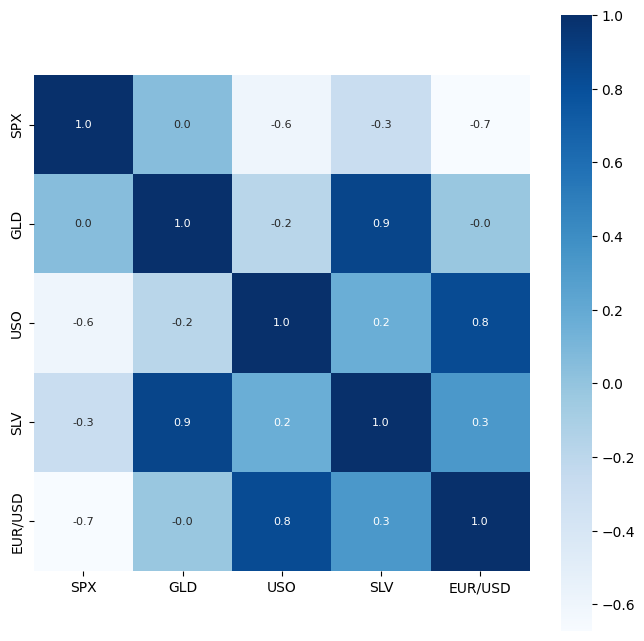

In [34]:
#Heatmap construction to understand the correlation
plt.figure(figsize = (8,8))
plt.figure(figsize=(8,8))
sns.heatmap(correlation,
            cbar=True,
            square=True,
            fmt='.1f',
            annot=True,
            annot_kws={'size':8},
            cmap='Blues')


In [36]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


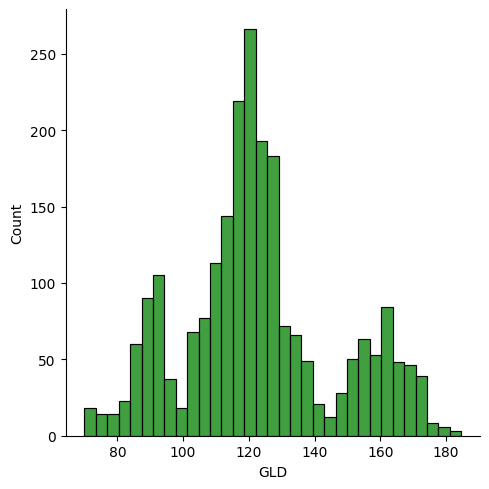

In [38]:
#checking the distribution of GLD
sns.displot(gold_data['GLD'], color='green')

Splitting the Features and Target

In [28]:
X = gold_data.drop(['Date', 'GLD'], axis = 1)
Y = gold_data['GLD']

In [29]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [39]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training and test data

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

Model Training:Random Forest Regressor

In [41]:
regressor = RandomForestRegressor(n_estimators=100)

In [42]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [43]:
#predicion on Test Data
test_data_prediction = regressor.predict(X_test)

In [44]:
print(test_data_prediction)

[168.66619995  81.86329982 116.25460044 127.53020052 120.69320102
 154.57529692 150.23569821 126.16149998 117.39529868 125.86480075
 116.79870095 171.40190137 141.55759833 167.85639872 115.04180041
 117.43490017 137.90870393 170.33720128 159.89860298 159.98539893
 155.05119973 125.43100004 175.82009939 157.01490418 125.1450004
  93.80210014  77.10290022 120.68629964 119.0022992  167.61709961
  88.15070059 125.34520019  91.16850097 117.77480028 121.11599876
 136.47170018 115.27600114 115.62470086 147.72790055 107.10450111
 104.22570221  87.23399814 126.44900062 117.82390022 153.57389864
 119.65710032 108.35959998 107.95479833  93.24450048 127.1439978
  75.23890005 113.63119901 121.0993     111.44009905 118.95109903
 120.29829945 158.42159922 168.26460159 146.94469696  85.82929857
  94.20970025  86.81579902  90.59680009 119.07830076 126.42600067
 127.62820001 169.22220026 122.22089928 117.37769907  98.32290041
 167.4303011  143.07759906 132.48750225 121.21960252 121.41229904
 119.6747004

In [45]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.989512485062141


Compare the Actual Values and Predicted Values in a Plot

In [47]:
Y_test = list(Y_test)

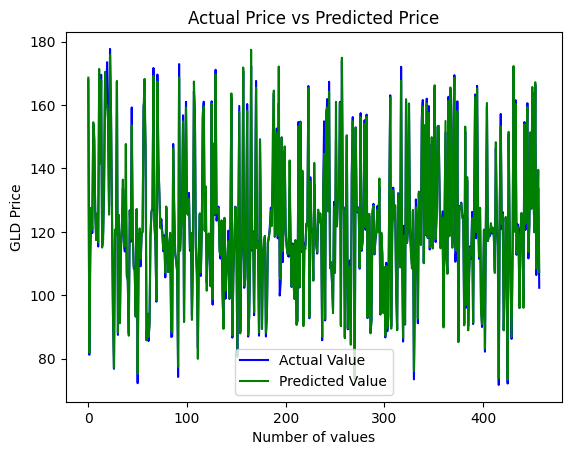

In [48]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [52]:
# Create a DataFrame comparing actual vs predicted values
comparison = pd.DataFrame({
    'Actual Value': Y_test,
    'Predicted Value': test_data_prediction
})

# Show the first few rows
print(comparison.tail(20))  # You can change 20 to show more

     Actual Value  Predicted Value
438    120.760002       118.859100
439    125.320000       125.984100
440    118.080002       118.682200
441     97.730003        96.025201
442    154.649994       154.006202
443    120.589996       122.508400
444    143.470001       147.758100
445    160.589996       159.373203
446    111.629997       113.637100
447    122.120003       122.452100
448    146.240005       151.417099
449    127.959999       127.224100
450    164.119995       165.717201
451    133.429993       135.512000
452    122.379997       119.836299
453    166.380005       167.211598
454    106.379997       108.425899
455    122.239998       121.677198
456    133.830002       139.582202
457    102.360001       107.368999
